<a href="https://colab.research.google.com/github/my-roki/KOSA_Fpht/blob/master/z_project/Keras_Architecture_ResNet50.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
### part 0
from tensorflow import keras
from tensorflow.keras import Input, layers, models
from tensorflow.keras import optimizers, regularizers
from keras.applications.resnet import ResNet50, decode_predictions

import numpy as np


### part 1

input_tensor = Input(shape=(128, 128, 3), dtype='float32', name='input')

# pre_trained_ResNet50
pre_trained_ResNet50 = ResNet50(weights='imagenet', include_top=False, input_shape=(128, 128, 3))
pre_trained_ResNet50.trainable = False
pre_trained_ResNet50.summary()

94773248/94765736 [==============================] - 1s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 134, 134, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 64, 64, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 64, 64, 64)   256         conv1_conv[0][0]                 
__________________________

In [3]:
# ResNet50 밑에 레이어 추가
model = models.Sequential()
model.add(pre_trained_ResNet50)
model.add(layers.Flatten())
model.add(layers.Dense(4096, kernel_regularizer = regularizers.l1_l2(l1=0.001,l2=0.001),activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(2048, kernel_regularizer = regularizers.l1_l2(l1=0.001,l2=0.001),activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1024, kernel_regularizer = regularizers.l1_l2(l1=0.001,l2=0.001),activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(4, activation='softmax'))


callbacks_list = [keras.callbacks.EarlyStopping(monitor = 'val_acc',
                                                patience = 5),
                 keras.callbacks.ModelCheckpoint(filepath='model.h5',
                                                    monitor = 'val_loss',
                                                    save_best_only = True)]

model.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['acc'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 4, 4, 2048)        23587712  
_________________________________________________________________
flatten (Flatten)            (None, 32768)             0         
_________________________________________________________________
dense (Dense)                (None, 4096)              134221824 
_________________________________________________________________
dropout (Dropout)            (None, 4096)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 2048)              8390656   
_________________________________________________________________
dropout_1 (Dropout)          (None, 2048)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 1024)             

In [4]:
### part 2

X_train, X_test, y_train, y_test = np.load('2ndtrial.npy', allow_pickle=True)

print(X_train.shape)

X_train = X_train.astype(float) / 255.0
X_test = X_test.astype(float) / 255.0

history = model.fit(X_train, y_train, batch_size = 16, epochs = 50, callbacks=callbacks_list, validation_data = (X_test, y_test))

score = model.evaluate(X_test, y_test)

(640, 128, 128, 3)
Epoch 1/50
40/40 [==============================] - 7s 185ms/step - loss: 1018.7068 - acc: 0.2516 - val_loss: 987.7366 - val_acc: 0.3037
Epoch 2/50
40/40 [==============================] - 6s 155ms/step - loss: 960.0104 - acc: 0.2500 - val_loss: 930.9562 - val_acc: 0.2477
Epoch 3/50
40/40 [==============================] - 9s 230ms/step - loss: 904.0095 - acc: 0.2875 - val_loss: 875.9702 - val_acc: 0.3037
Epoch 4/50
40/40 [==============================] - 17s 435ms/step - loss: 849.9232 - acc: 0.2688 - val_loss: 822.8303 - val_acc: 0.2477
Epoch 5/50
40/40 [==============================] - 19s 468ms/step - loss: 797.6713 - acc: 0.2812 - val_loss: 771.5107 - val_acc: 0.3037
Epoch 6/50
7/7 [==============================] - 1s 79ms/step - loss: 722.0175 - acc: 0.2477


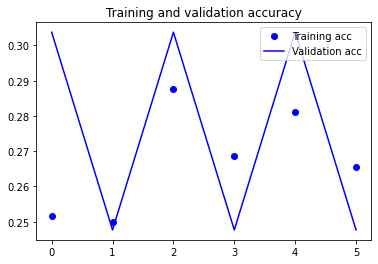

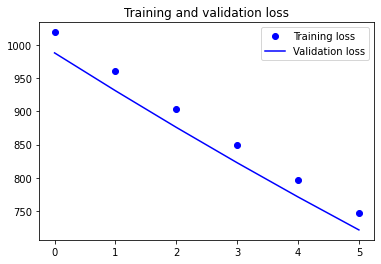

In [5]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))
import matplotlib.pyplot as plt

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [6]:
### part 3 이미지 잘 분류하나 확인하기

from tensorflow.keras.preprocessing import image


img = image.load_img('frame116.jpg', target_size=(128, 128))
img = image.img_to_array(img)
img = np.expand_dims(img, axis=0)
img = img.astype(float) / 255
model.predict(img)

array([[0.2404074 , 0.22614597, 0.26061845, 0.27282816]], dtype=float32)

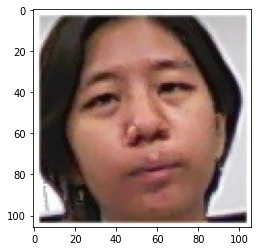

In [7]:
import cv2

test1 = cv2.imread("frame116.jpg")
test1.shape

#cv2 bgr -> rgb로 조정
b, g, r = cv2.split(test1)    
test1 = cv2.merge([r,g,b])  

# 시각화
plt.figure()
plt.imshow(test1)
plt.show()

In [8]:
img = image.load_img('frame61.jpg', target_size=(128, 128))
img = image.img_to_array(img)
img = np.expand_dims(img, axis=0)
img = img.astype(float) / 255
model.predict(img)

array([[0.24049997, 0.22592695, 0.26106867, 0.2725044 ]], dtype=float32)

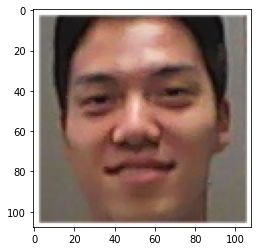

In [9]:
test1 = cv2.imread("frame61.jpg")
test1.shape

#cv2 bgr -> rgb로 조정
b, g, r = cv2.split(test1)    
test1 = cv2.merge([r,g,b])  

# 시각화
plt.figure()
plt.imshow(test1)
plt.show()

In [10]:
img = image.load_img('frame7.jpg', target_size=(128, 128))
img = image.img_to_array(img)
img = np.expand_dims(img, axis=0)
img = img.astype(float) / 255
model.predict(img)

array([[0.2407765 , 0.22656712, 0.26096645, 0.27169   ]], dtype=float32)

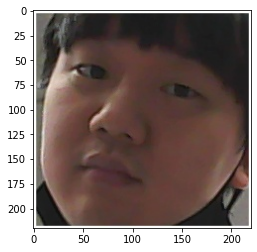

In [11]:
test1 = cv2.imread("frame7.jpg")
test1.shape

#cv2 bgr -> rgb로 조정
b, g, r = cv2.split(test1)    
test1 = cv2.merge([r,g,b])  

# 시각화
plt.figure()
plt.imshow(test1)
plt.show()

In [12]:
img = image.load_img('frame29.jpg', target_size=(128, 128))
img = image.img_to_array(img)
img = np.expand_dims(img, axis=0)
img = img.astype(float) / 255
model.predict(img)

array([[0.24028489, 0.22566174, 0.26125678, 0.2727966 ]], dtype=float32)

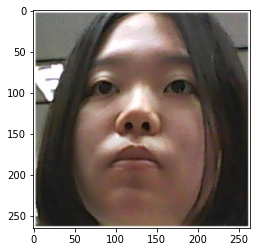

In [13]:
test1 = cv2.imread("frame29.jpg")
test1.shape

#cv2 bgr -> rgb로 조정
b, g, r = cv2.split(test1)    
test1 = cv2.merge([r,g,b])  

# 시각화
plt.figure()
plt.imshow(test1)
plt.show()